In [ ]:
from __future__ import division
%pylab inline

In [ ]:
from input_data import *
import csv

repins_map = {}

total_repins = 0
total_users = None
with open(INPUT_REPINS_ORIGIN, 'rb') as repins_file:
    reader = csv.reader(repins_file, delimiter='|')
    
    for row in reader:
        total_repins += 1
        
        user_id = int(row[0])
        pin_id = int(row[1])
        
        if user_id in repins_map:
            repins_map[user_id] += 1
        else:
            repins_map[user_id] = 1

total_users = len(repins_map)

items = repins_map.items()
min_no_of_repins = min(items, key=lambda x: x[1])[1]
max_no_of_repins = max(items, key=lambda x: x[1])[1]

print 'Minimum number of repins', min_no_of_repins
print 'Maximum number of repins', max_no_of_repins
print 'Average number of repins per user', total_repins / total_users

Minimum number of repins 1
Maximum number of repins 95
Average number of repins per user 6.27840444384


In [ ]:
map_pins_per_category = {}

with open(INPUT_REPINS_ORIGIN, 'rb') as repins_file:
    reader = csv.reader(repins_file, delimiter='|')
    
    for row in reader:
        user_id = int(row[0])
        pin_id = int(row[1])
        cat_id = int(row[2])
        
        if cat_id in map_pins_per_category:
            map_pins_per_category[cat_id] += 1
        else:
            map_pins_per_category[cat_id] = 1

map_categories = {}
with open(INPUT_CATEGORIES, 'rb') as repins_file:
    reader = csv.reader(repins_file, delimiter='|')
    
    for row in reader:
        cat_name = row[0]
        cat_id = int(row[1])
        map_categories[cat_id] = cat_name

items = []
for cat_id in map_pins_per_category.keys():
    if cat_id not in map_categories:
        print 'Unknown category id', cat_id
        continue
    
    cat_name = map_categories[cat_id]
    
    items.append((cat_name, map_pins_per_category[cat_id]))

import operator
items.sort(key=operator.itemgetter(1), reverse=True)

for x in items:
    print x[0], 'has', x[1], 'repins'

animals has 144624 repins
cars_motorcycles has 97983 repins
architecture has 82539 repins
art has 80628 repins
design has 77384 repins
geek has 53949 repins
mens_fashion has 52933 repins
celebrities has 52845 repins
film_music_books has 49617 repins
home_decor has 44328 repins
humor has 39326 repins
history has 33472 repins
gardening has 32496 repins
education has 27598 repins
diy_crafts has 24857 repins
photography has 24484 repins
travel has 22978 repins
science_nature has 21458 repins
outdoors has 17823 repins
sports has 16173 repins
hair_beauty has 16001 repins
food_drink has 14334 repins
quotes has 13175 repins
womens_fashion has 13013 repins
tattoos has 10570 repins
illustrations_posters has 8177 repins
products has 7234 repins
kids has 6430 repins
health_fitness has 5542 repins
technology has 5200 repins
holidays_events has 4599 repins
weddings has 3631 repins


(-0.5, 399.5, 199.5, -0.5)

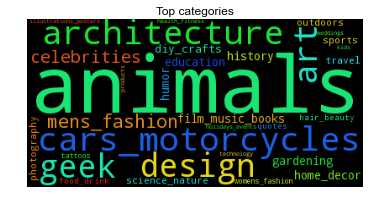

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_categories = []
for cat_id in map_pins_per_category.keys():
    if cat_id not in map_categories:
        print 'Unknown category id', cat_id
        continue
    
    cat_name = map_categories[cat_id]
    count = map_pins_per_category[cat_id]
    for i in range(count):
        wc_categories.append(cat_name)
    
str_categories = ','.join(wc_categories)

wordcloud = WordCloud().generate(str_categories)
# Open a plot of the generated image.
plt.title('Top categories')
plt.imshow(wordcloud)
plt.axis("off")

No of intervals: 21
Interval size: 4.47619047619


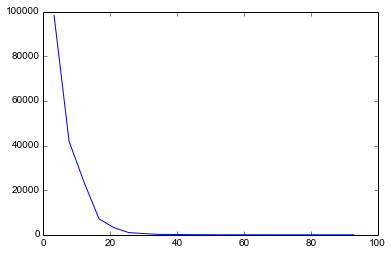

In [ ]:
import matplotlib.pyplot as plt
import math

no_of_intervals =int(1 + 3.322 * math.log10(total_repins))
print 'No of intervals:', no_of_intervals
interval_size = (max_no_of_repins - min_no_of_repins) * 1. / no_of_intervals
print 'Interval size:', interval_size

distribution = []
for i in range(no_of_intervals):
    interval_start = min_no_of_repins + i * interval_size
    interval_end = interval_start + interval_size
    
    count = sum([1 for x in repins_map.values() if x >= interval_start and x < interval_end])
    interval_middle = (interval_start + interval_end) / 2
    item = (interval_middle, count)

    distribution.append(item)

x = [z[0] for z in distribution]
y = [z[1] for z in distribution]
plt.plot(x, y)

In [ ]:
from input_data import *
import csv

mpu = {}
with open(INPUT_REPINS, 'rb') as repins_file:
    reader = csv.reader(repins_file, delimiter='|')
    
    for row in reader:
        user_id = int(row[0])
        pin_id = int(row[1])
        
        if pin_id in mpu:
            mpu[pin_id].append(user_id)
        else:
            mpu[pin_id] = [user_id]

lpc = [(k, len(v)) for k, v in mpu.iteritems()]

import operator
lpc.sort(key=operator.itemgetter(1), reverse=True)

In [ ]:
mpi = {}
with open(INPUT_IMAGES, 'rb') as repins_file:
    reader = csv.reader(repins_file, delimiter='|')
    
    for row in reader:
        pin_id = int(row[0])
        url = row[1]
        mpi[pin_id] = url

top_pins = lpc[:50]
for pin_id, count in top_pins:
    if pin_id not in mpi:
        print 'Pin', str(pin_id) + ', repined', count, 'times, not found'
        continue
    
    url = mpi[pin_id]
    print 'Pin', pin_id, url, 'has been repined', count, 'times'

Pin 44 http://media-cache-ec0.pinimg.com/736x/3a/4d/36/3a4d361367881466e1cabeb277f3a3f2.jpg has been repined 879 times
Pin 23246 http://media-cache-ec0.pinimg.com/736x/bc/85/1a/bc851ae3bf2f10cbed517d0d0dad8eae.jpg has been repined 869 times
Pin 14750 http://media-cache-ec0.pinimg.com/736x/69/18/6e/69186eceec49ef1e8c8c0471020d168e.jpg has been repined 546 times
Pin 7750 http://media-cache-ak0.pinimg.com/736x/28/37/a3/2837a3436663b0c1c382ee8a93bcec41.jpg has been repined 524 times
Pin 8068 http://media-cache-ak0.pinimg.com/736x/cf/09/ab/cf09ab8174dd1bcb499b8fd155784ca8.jpg has been repined 421 times
Pin 234 http://media-cache-cd0.pinimg.com/736x/5c/83/37/5c833707605063d548bae7fb6beb44cc.jpg has been repined 420 times
Pin 2998 http://media-cache-ec0.pinimg.com/736x/a1/35/96/a135962c676a92ac3d36973cf22f5037.jpg has been repined 365 times
Pin 1839 http://media-cache-ec0.pinimg.com/736x/7a/7c/16/7a7c16aa56f53a790bcc4db332120db1.jpg has been repined 352 times
Pin 24979 http://media-cache-ec0.